# Critical $\alpha$ policies for the 3D BTX system

## Python imports
We shall use the `Sympy` package to perform the symbolic computations.

In [12]:
import sympy
sympy.init_printing(use_unicode=False, wrap_line=False)

## Define Sympy symbols, kinetics and DSR mixing point

In [13]:
cB,cE,cT = sympy.symbols('c_B, c_E, c_T')

#3D BTX kinetics; taken from chapter 7
k1 = 1
k2 = 1
k3 = 10

rB = -k1*cB*sympy.sqrt(cE) - 2*k3*cB**2
rE = -0.5*k1*cB*sympy.sqrt(cE) - 0.5*k2*cT*sympy.sqrt(cE)
rT = k1*cB*sympy.sqrt(cE) - k2*cT*sympy.sqrt(cE)

#rate vector and mixing vector
r = sympy.Matrix([rB, rE, rT])
C = sympy.Matrix([cB, cE, cT])
C0 = sympy.Matrix([1, 0.5, 0])

#mixing vector
v = C - C0

## Normal vector: n

The exporession for $ \mathbf{n}\left(\mathbf{C}\right) $ is given by
$$ \mathbf{n}\left(\mathbf{C}\right) = \mathbf{v}\left(\mathbf{C}\right) \times \mathbf{r}\left(\mathbf{C}\right) $$

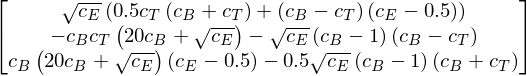

In [14]:
n = sympy.simplify(v.cross(r)) #v x r (not r x v!!)
n

## Jacobian matrix: $\mathrm{d}\mathbf{r}\left(\mathbf{C}\right)$


$$ \mathrm{d}\mathbf{r}\left(\mathbf{C}\right)=\begin{bmatrix}\frac{\partial\mathrm{r_{A}}\left(\mathbf{C}\right)}{\partial\mathrm{c_{A}}} & \cdots & \frac{\partial\mathrm{r_{A}}\left(\mathbf{C}\right)}{\partial\mathrm{c}_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial\mathrm{r}_{n}\left(\mathbf{C}\right)}{\partial\mathrm{c_{A}}} & \cdots & \frac{\partial\mathrm{r}_{n}\left(\mathbf{C}\right)}{\partial\mathrm{c}_{n}}
\end{bmatrix} $$

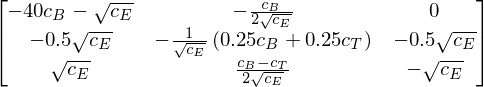

In [15]:
dr = r.jacobian(sympy.Matrix([cB,cE,cT]))
dr = sympy.simplify(dr)
dr

## Calculating $ \varphi\left( \mathbf{C} \right) $

We can calculate $\varphi\left(\mathbf{C}\right)$ from the expression:

$$ \varphi\left(\mathbf{C}\right) = \left[\mathrm{d}\mathbf{r}\left(\mathbf{C}\right).\mathbf{v}\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{n}\left(\mathbf{C}\right) $$

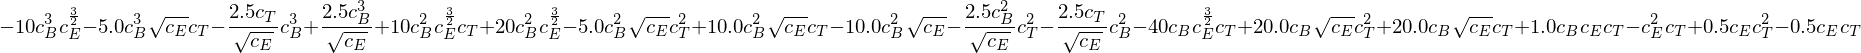

In [16]:
phi = ((dr*v).T)*n
phi = sympy.simplify(phi[0])
phi = sympy.expand(phi)
phi

## Calculating $ \nabla\varphi\left(\mathbf{C}\right) $

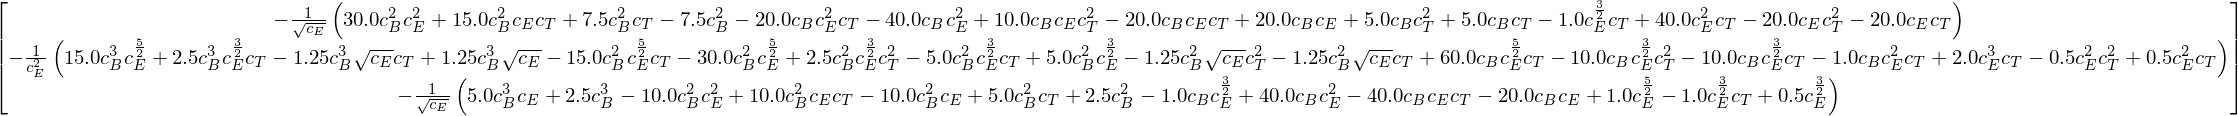

In [17]:
grad_phi = sympy.Matrix((sympy.diff(phi,cB), sympy.diff(phi,cE), sympy.diff(phi,cT)))
grad_phi = sympy.simplify(sympy.Matrix(1,3,grad_phi))
sympy.factor(grad_phi.T)

## Calculating $\alpha$

Next, we compute $\alpha$ from
$$ \alpha=\frac{\left[\nabla\varphi\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{r}\left(\mathbf{C}\right)}{\left[\nabla\varphi\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{v}\left(\mathbf{C}\right)} $$

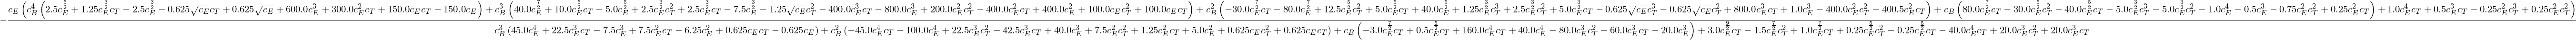

In [18]:
top_expr = sympy.simplify((grad_phi*r)[0])
bot_expr = sympy.simplify((grad_phi*v)[0])

alpha = sympy.simplify(top_expr/bot_expr)
sympy.factor(alpha, cB)

This is a rather complex function. We can simplify it slightly by substituting in the function for $c_D$, solved for eariler, resulting in an expression that is a function of $c_A$ and $c_B$ only

In [19]:
print sympy.python(alpha)

c_E = Symbol('c_E')
c_B = Symbol('c_B')
c_T = Symbol('c_T')
e = -c_E*(c_E*(c_B*(20*c_B + sqrt(c_E))*(Float('30.0', prec=15)*c_B**2*c_E**2 + Float('15.0', prec=15)*c_B**2*c_E*c_T + Float('7.5', prec=15)*c_B**2*c_T - Float('7.5', prec=15)*c_B**2 - Float('20.0', prec=15)*c_B*c_E**2*c_T - Float('40.0', prec=15)*c_B*c_E**2 + Float('10.0', prec=15)*c_B*c_E*c_T**2 - Float('20.0', prec=15)*c_B*c_E*c_T + Float('20.0', prec=15)*c_B*c_E + Float('5.0', prec=15)*c_B*c_T**2 + Float('5.0', prec=15)*c_B*c_T - Float('1.0', prec=15)*c_E**Rational(3, 2)*c_T + Float('40.0', prec=15)*c_E**2*c_T - Float('20.0', prec=15)*c_E*c_T**2 - Float('20.0', prec=15)*c_E*c_T) - sqrt(c_E)*(c_B - c_T)*(Float('5.0', prec=15)*c_B**3*c_E + Float('2.5', prec=15)*c_B**3 - Float('10.0', prec=15)*c_B**2*c_E**2 + Float('10.0', prec=15)*c_B**2*c_E*c_T - Float('10.0', prec=15)*c_B**2*c_E + Float('5.0', prec=15)*c_B**2*c_T + Float('2.5', prec=15)*c_B**2 - Float('1.0', prec=15)*c_B*c_E**Rational(3, 2) + Float('40.0', prec=15)*c_B*c_

which is our final expression for $\alpha$ in terms of the specified mixing vector

## Convert Python syntax to MATLAB
Below is a set of text replacements that converts Python syntax to MATLAB sytax. I've found this very useful for my workflow -- by doing the algebra with a IPython notebook, and then converting the final result into something that MATLAB can understand and plotted with all other figures.

In [20]:
expr_str = sympy.python(phi)
expr_str = expr_str.replace("**","^")
expr_str = expr_str.replace("Float('","")
expr_str = expr_str.replace("', prec=15)","")
expr_str = expr_str.replace("Rational","")
expr_str = expr_str.replace(", ","/")
expr_str = expr_str.replace("c_B", "C(1)")
expr_str = expr_str.replace("c_E", "C(2)")
expr_str = expr_str.replace("c_T", "C(3)")

print expr_str

C(1) = Symbol('C(1)')
C(2) = Symbol('C(2)')
C(3) = Symbol('C(3)')
e = -10*C(1)^3*C(2)^(3/2) - 5.0*C(1)^3*sqrt(C(2))*C(3) - 2.5*C(1)^3*C(3)/sqrt(C(2)) + 2.5*C(1)^3/sqrt(C(2)) + 10*C(1)^2*C(2)^(3/2)*C(3) + 20*C(1)^2*C(2)^(3/2) - 5.0*C(1)^2*sqrt(C(2))*C(3)^2 + 10.0*C(1)^2*sqrt(C(2))*C(3) - 10.0*C(1)^2*sqrt(C(2)) - 2.5*C(1)^2*C(3)^2/sqrt(C(2)) - 2.5*C(1)^2*C(3)/sqrt(C(2)) - 40*C(1)*C(2)^(3/2)*C(3) + 20.0*C(1)*sqrt(C(2))*C(3)^2 + 20.0*C(1)*sqrt(C(2))*C(3) + 1.0*C(1)*C(2)*C(3) - C(2)^2*C(3) + 0.5*C(2)*C(3)^2 - 0.5*C(2)*C(3)


In [21]:
alpha.subs([(cB,0.999), (cE,0.49999), (cT,0)])

In [22]:
sympy.simplify(alpha.subs([(cB,0.999), (cE,0.5), (cT,0.0001)]))